## Preamble

In [6]:
from pydci.examples.monomial import monomial
from pydci.DCIProblem import DCIProblem, logger, enable_log
from scipy.stats.distributions import norm
import numpy as np

__author__ = "Carlos del-Castillo-Negrete"
__copyright__ = "Carlos del-Castillo-Negrete"
__license__ = "mit"

seed = 123456

_ = enable_log()

[04/05/23 02:35:38] INFO     Logger initialized                                                           ]8;id=767119;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=415454;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#35\35]8;;\

<a id='Title'></a>
# <center> Data-Consistent Inversion Class
_____

<center>
    Notebook by:
    <br>
    Carlos del-Castillo-Negrete (<font color='blue'>cdelcastillo21@gmail.com</font>)
</center>

The purpose of this notebook is to demonstrate usage of the `DCIProblem` class and plotting capabilities.

<a id='Title'></a>
## Data-Consistent Update Formula: 

$\Large \pi_{up}(\lambda) = \pi_{in}(\lambda)\frac{\pi_{ob}(Q(\lambda))}{\pi_{pred}(Q(\lambda))}$


Note:

* $\pi_{in}$ represents initial descripton of aleatoric, or irreducible, uncertainty on $\Lambda$.

* Data-Consistent comes from Disintegration theorem and Bayes rule [ref].


## Example 1 - Low Dimensional Example
---

We start with a simple QoI map over a one-dimensional parameter space:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q(\lambda) = \lambda^5 \rightarrow \mathcal{D} = [-1, 1] $$

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

### Data

We take $N$ samples from an initial uniform distribution over the input parameter space. These samples will be pushed forward through our QoI map to constrcut the predicted density $\pi_{pred}$:

In [7]:
# Number of samples to use, and assumed observed normal distribution parameters
p, num_samples, mu, sigma, domain = 5, int(1e3), 0.25, 0.1, [-1, 1]
lam, q_lam, data = monomial(
    p=p,
    num_samples=num_samples,
    domain=domain,
    mu=mu,
    sigma=sigma,
    N=5)
obs_dist = norm(loc=np.mean(data), scale=sigma)
lam.shape, q_lam.shape, data.shape

((1000, 1), (1000, 1), (5,))

In [8]:
# Construct density problem object using lambda samples and QoI Values
# Note by default DensityProblem class assumes uniform distribution over domain if nothing specified
# The predicted distribution will be determined from a Gaussian Kernel Density Estimate over predicted values
# Have to set observed distribution -> assuming known sample mean, 0.25, and std dev, 0.1, from observed data.
d_prob = DCIProblem(lam, q_lam, obs_dist)
d_prob.solve()
d_prob.state           # State stores all info on the DCI problem as solved

[04/05/23 02:35:44] INFO     Initialized Data-Consistent Inversion Class                           ]8;id=764410;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/DCIProblem.py\DCIProblem.py]8;;\:]8;id=687343;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/DCIProblem.py#71\71]8;;\

,lam_0,q_lam_0,weight,pi_in,pi_pr,pi_obs,ratio,pi_up
0,-0.424225,-1.373988e-02,1.0,0.491558,3.267802,1.158968e-01,3.546630e-02,1.743374e-02
1,0.282317,1.793448e-03,1.0,0.517966,3.313402,1.731011e-01,5.224269e-02,2.705996e-02
2,-0.287924,-1.978735e-03,1.0,0.489913,3.313350,1.573812e-01,4.749910e-02,2.327045e-02
3,0.860154,4.708480e-01,1.0,0.408685,0.214900,3.661740e-01,1.703925e+00,6.963682e-01
4,0.024385,8.621509e-09,1.0,0.504943,3.314268,1.654698e-01,4.992651e-02,2.521002e-02
...,...,...,...,...,...,...,...,...
995,-0.425497,-1.394706e-02,1.0,0.491594,3.266396,1.152596e-01,3.528647e-02,1.734663e-02
996,0.073743,2.180727e-06,1.0,0.511482,3.314268,1.654789e-01,4.992925e-02,2.553791e-02
997,0.667674,1.326848e-01,1.0,0.483652,1.041955,1.950973e+00,1.872416e+00,9.055984e-01
998,-0.033961,-4.517498e-08,1.0,0.496024,3.314268,1.654696e-01,4.992645e-02,2.476471e-02


In [41]:
from pydci.utils import get_df
get_df(d_prob.state.loc[[np.argmax(d_prob.state['pi_up'])]], 'lam', size=1)[0]

array([0.77013487])

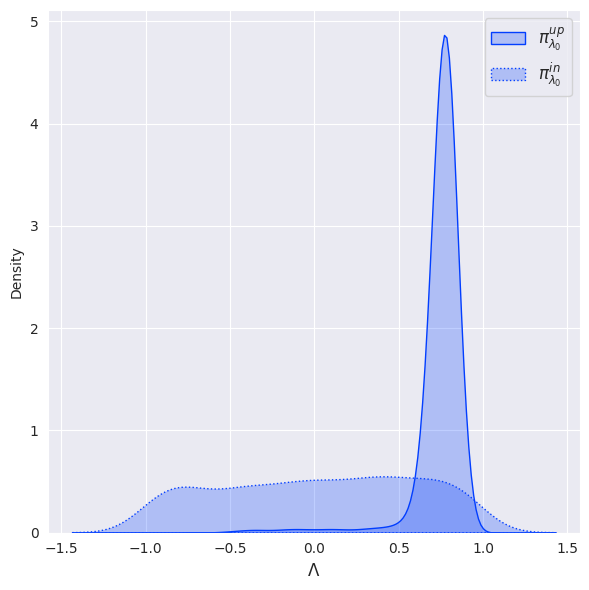

In [5]:
ax = d_prob.plot_param_state(plot_initial=True)

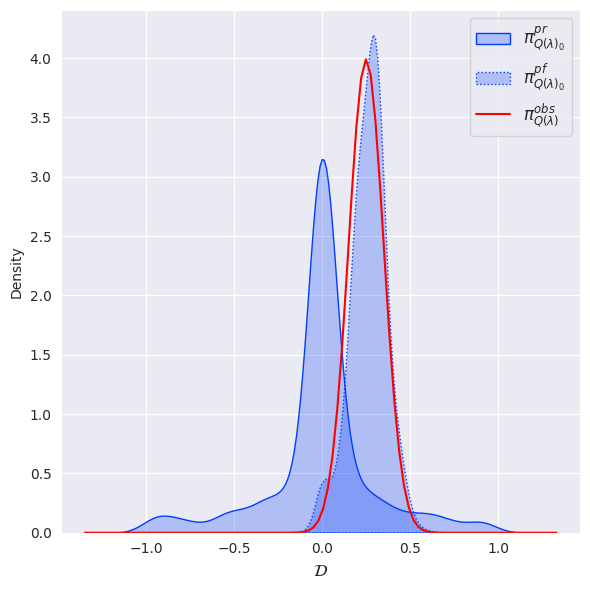

In [6]:
ax = d_prob.plot_obs_state(plot_pf=True)